# Tarea 4: Bases de datos 

Esta tarea se requerirá que investiguen un poco de algunas paqueterías, en especial sobre la paquetería <a href=" https://julianlsolvers.github.io/LsqFit.jl/latest/tutorial/">LsqFit</a> . La paquetería es para hacer ajuste (algo similar a mínimos cuadrados) de datos. 
    
Para Instalar la paquetería, igual que con el resto hasta ahora, tienen que escribir en una celda:

] add LsqFit
    
Una vez instalada la cargan usando: 

using LsqFit

Además, para un par de los problemas avanzados requerirás hacer un Bot de Telegram, así que revisa los videos correspondientes también. 

**Equipo:**

- Martín Alberto Herrera Garza

- Victor Emmanuel Miguel Ángel Ocampo García

## Problemas Básicos

Antes de comenzar a trabajar en los ejercicios, necesitas conseguir datos de un experimento o generar datos ficticios buenos. Es necesario que el experimento sea suficientemente "complejo" en el siguiente sentido. Debe haber mediciones directas (como medir la intensidad de la luz, sonido, posición de algo, un ángulo de disperción, etc) y mediciones indirectas (es decir, cantidades que obtienes a partir de las mediciones directas, por ejemplo una velocidad, una longitud de onda, etc.) que obtengas mediante una fórmula. Además debes de conocer cuál es, de las mediciones indirectas, la curva teórica. Casi todos los experimentos de los laboratorios de la facultad sirven para estos propósitos. Si estás haciendo una práctica, es muy probable que los datos que hayas recabado cumplan con estos criterios y puedas usar estos problemas del curso para matar dos pájaros de un tiro (disculpen la expresión), resolver la tarea y hacer unas bonitas gráficas con resultados buenos. 
    
[1] Utilizando DataFrames genera una base de datos **vacía** de algún experimento de labotartorio, poniendo sólo las columnas de lo que se mide directamente en el experimento y después llénala de datos. Por ejemplo, digamos que filmaste un péndulo doble en el laboratorio de mecánica y con Tracker obtuviste la posición de cada una de las masas del péndulo en cada frame del video. Entonces tu base de datos debería ser PenduloDoble y debería tener las columnas $tiempo$, $x_1$, $y_1$, $x_2$, $y_2$ que representen, el $tiempo =$ número de frame $\times$ tiempo por frame (típicamente 1/24), $x_1$ debería ser la posición en $x$ de la masa 1, $x_2$ la posición en $x$ de la masa 2, etc... Recuerda que la base de datos por lo pronto está vacía. 

**Nota** Abre una celda de MarkDown para explicar brevemente en qué consiste el experimento. 
**Nota2** No necesita ser un experimento real, puedes poner ruido ficticio a los datos de una función de algo que deberías obtener experimentalmente. Sólo, en caso de que sean datos inventados, trata que sean realistas y sobre algún experimento interesante del que conozcas la teoría. 

In [2]:
using CSV, DataFrames, Plots, Statistics, Random

El experimento consta de un pendulo simple falso. Lo que haré sera generar datos a partir de sumarle un número aleatorio a las funciones teoricas. Dicho esto veamos en que consiste el experimento.

Nosotros tenemos una bolita de masa m atada a un hilo que estafijado en un punto (0,0). Luego se perturba dicha masa de tal forma que la bolita hace un $\pi /8$ con el eje y y se suelta. Ahora las ecuaciones de la coordenada x y la coordenada y son:

$$ x(\theta) = l sin(\theta) $$
$$ y(\theta) = - l cos(\theta) $$

Donde $\theta$ es el ángulo que forma la cuerda con el eje y. Por lo que:

$$\theta = arctan( \dfrac{x}{y})$$

Al plantear el lagrangiano y usar las ecuaciones de Euler Lgrange encontramos que theta debe satisfacer la ecuación diferencial:

$$ \dfrac{d^2 \theta}{d t^2} \  +  \ \sqrt(\dfrac{l}{g}) sin(\theta) = 0 $$

que en aproximación de angulos pequeños es: 
$$ \dfrac{d^2 \theta}{d t^2} \  +  \ \dfrac{l}{g} \theta = 0 $$

lo cual es la ecuación de O.A. por lo que:
$$\theta (t) = A cos( \omega t) $$

Donde $A= \pi / 8 $ mientras que $ \omega = \sqrt(\dfrac{l}{g}) $. Como A es positivo significa que el ángulo si está en el cuadrante IV es positivo mientras que si esta en el cuadrante III es negativo. (esto lo digo porque abajo al sacar atan pongo negativos). 

Ahora, la idea es que las posiciones x and y de la masa fueron sacadas con tracker y lo que buscamos es ver que el ángulo $\theta$ en efecto satisface la ecuación de O.A. para ángulos pequeños. Pondremos que $l=1m$.


In [3]:
#Está celda solo es para generar los datos 
l=1
g=9.825
θ(t) = (π/8)*cos((sqrt(l/g))*t)

x(t)= l* sin( θ(t) )
y(t)= -l* cos( θ(t) )
#este es el tiempo pondremos que lo vimos desde el segundo 0 hasta el segundo 20
t=0:(1/24):20
#pongo la semilla para que sean los mismo datos al volver a correr la celda 
Random.seed!(1234);
#estos serían los datos inventados
posicion_x=[x(i) + rand(-0.1:0.01:0.1) for i ∈ t]
posicion_y=[y(i)+ rand(-0.05:0.001:0.05) for i ∈ t]



481-element Vector{Float64}:
 -0.9408795325112868
 -0.9308928092046205
 -0.9239326302664178
 -0.9139989686474183
 -0.9220917792833568
 -0.933210999121714
 -0.9453565471591593
 -0.9115283244896814
 -0.8877262143633959
 -0.8909500822560206
 -0.8891997759490033
 -0.9384751256202901
 -0.8937759439457125
  ⋮
 -0.9520581600253466
 -0.8749740978436586
 -0.8799165248122496
 -0.8888854800401388
 -0.9108809846148478
 -0.8869030415898882
 -0.9419516359829488
 -0.9220267347847861
 -0.8941282869788149
 -0.887256223571395
 -0.93741045763281
 -0.8985908843489294

In [4]:
#Base de datos vacía 
Datos= DataFrame(tiempo=Float64[], x_posicion=Float64[], y_posicion=Float64[])

,tiempo,x_posicion,y_posicion
,Float64,Float64,Float64


In [6]:
#Esto es para rellenar el DataFrame
for j ∈ 1:length(t)
    for i ∈ 1:3
        push!(Datos[!,i],0)
    end
end
l_lista=[t, posicion_x, posicion_y]
for i ∈ 1: length(l_lista)
    Datos[:,i] = l_lista[i]
end

In [8]:
Datos

,tiempo,x_posicion,y_posicion
,Float64,Float64,Float64
1,0.0,0.342683,-0.94088
2,0.0416667,0.392651,-0.930893
3,0.0833333,0.322555,-0.923933
4,0.125,0.462395,-0.913999
5,0.166667,0.352171,-0.922092
6,0.208333,0.361882,-0.933211
7,0.25,0.48153,-0.945357
8,0.291667,0.441113,-0.911528
9,0.333333,0.380633,-0.887726


[2] Con los datos del experimento se trata de obtener alguna otra medición, por ejemplo, la velocidad angular de las masas o cómo difiere en el tiempo dos trayectorias cercanas (de dos filmaciones). Agrega las columnas que faltan ya con los datos calculados. Algo importante a tomar en cuenta es el error directo en la medición, es decir, el erro del instrumento de medición. En el caso de lo que se mide directamente es un error típicamente constante, pero las mediciones indirectas su error de medición típicamente depende de la medición en sí, por lo que para cada valor hay que calcular el error, no olvides agregar la correspondiente columna o columans a los errores.  

**Nota:** Si tienes dudas de la propagación del error revisa https://es.wikipedia.org/wiki/Propagaci%C3%B3n_de_errores. Aunque es un tema que todos los físicos deberíamos dominar súper bien, no es verdad que lo dominemos y frecuentemente hacemos mal los cálculos (por bien que dominemos las derivadas). 

In [9]:
#La función para medir el error 
function error_θ(v)
    δ_x=0.005
    δ_y=0.005
    error= abs((v[2]/(v[1]^2 + v[2]^2)))* δ_x + abs((v[1]/(v[1]^2 + v[2]^2)))* δ_y
    return error
end
#el siguiente bloque es para generar los datos que encesitamos a partir del dataframe
angulo=[]
error=[]
num_ren=size(Datos,1)
for i ∈ 1:num_ren
    push!(angulo, -atan((Datos.x_posicion[i])/(Datos.y_posicion[i])) )
    push!(error, error_θ([Datos.x_posicion[i], Datos.y_posicion[i]]))
end
#el menos en la atan es por como se mide el ánglo, si la x es positiva quiero medir el ángulo positivo
#si la x es negativa lo queremos negativo 

In [10]:
#agrego los datos a la tabla con su respectiva incertidumbre δθ
insertcols!(Datos,4, "θ_ángulo" => angulo)
insertcols!(Datos,5, "δθ" => error)

,tiempo,x_posicion,y_posicion,θ_ángulo,δθ
,Float64,Float64,Float64,Any,Any
1,0.0,0.342683,-0.94088,0.349283,0.00640062
2,0.0416667,0.392651,-0.930893,0.399158,0.00648328
3,0.0833333,0.322555,-0.923933,0.335883,0.00650776
4,0.125,0.462395,-0.913999,0.468359,0.00655923
5,0.166667,0.352171,-0.922092,0.364829,0.00653953
6,0.208333,0.361882,-0.933211,0.369929,0.00646356
7,0.25,0.48153,-0.945357,0.47111,0.00633851
8,0.291667,0.441113,-0.911528,0.450707,0.00659526
9,0.333333,0.380633,-0.887726,0.405062,0.00679765


[3] Haz una descripción general de tus datos (promedio, valor mínimo, valor máximo y desviación estandar).

In [11]:
describe(Datos,:mean, :min, :max, :std)

,variable,mean,min,max,std
,Symbol,Float64,Float64,Float64,Float64
1,tiempo,10.0,0.0,20.0,5.79154
2,x_posicion,0.00751126,-0.481655,0.48153,0.282903
3,y_posicion,-0.958152,-1.04388,-0.874974,0.03875
4,θ_ángulo,0.00844279,-0.479433,0.49583,0.287414
5,δθ,0.00605741,0.00491071,0.00689484,0.000485742


[4] Usa la paquetería LsqFit para ajustar la(s) curva(s) teórica(s) que deberías observar en los datos que obtuviste. Por ejemplo, si medí como varía en el tiempo la distancia entre las dos trayectorias de un péndulo doble, podría esperar que esa distancia creciera exponencialmente, así que tendría que ajustarle una curva exponencial. Si medí un péndulo simple, tanto la posición, como la velocidad deberían seguir la función $Asin(\omega t)$. 

Interpreta los parámetros que obtengas del ajuste (por ejemplo, en el caso de la separación entre trayectorias, el parámetro dentro de la exponencial es el exponente de Lyapunov, o en el caso del péndulo simple, la $A$ es la amplitud y $\omega$ es la frecuencia.

In [12]:
using LsqFit

In [13]:
model(x,p)= p[1]*cos.(p[2]*x)
p_0=[Datos.tiempo[1], Datos.θ_ángulo[1]]
fit= curve_fit(model, Datos.tiempo, Datos.θ_ángulo, p_0)

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Any}}([0.39532664378762594, 0.31799533764174925], [0.046043744615589854, -0.003865877891212288, 0.059305061851471996, -0.07334459854639591, 0.029942836129457306, 0.02453017469718327, -0.07703197802563655, -0.05707937865694379, -0.011954128661135766, -0.05721747441380026  …  0.023678823057522558, -0.09357028727157252, 0.01635333877606515, -0.03082469636672225, 0.046551360246827156, 0.039712217522824056, 0.04930670923691943, 0.007664463302634095, 0.03588130608912227, -0.06203685924739466], [0.9999999999960525 0.0; 0.9999122226017996 -0.00021824366616614698; … ; 0.9979863516197234 -0.5004589183264453; 0.997058353228975 -0.6060057125412416], true, Any[])

In [14]:
#En este caso la interpretación es que ω = coef(fit)[2] y tambien A=coef(fit)[1] en nuestro modelo de 
#péndulo simple, donde ω es la frecuencia en el que oscila θ mientras que A es la amplitud. 
coef(fit)
ω=coef(fit)[2]
Amp=coef(fit)[1]

0.39532664378762594

[5] Haz una gráfica de tus datos, variable independiente vs variable dependiente. Típicamente se tiene 1 variable independiente y varias dependientes, pero puede que tengas más de una variable independiente. Una gráfica por cada combinación variable dependiente vs variable independiente. Si tienes muchísimas variables, sólo elije las combinaciones que consideres importantes y en epecial, las que incluyan el(los) ajuste(s) teórico(s) que hayas obtenido en el problema anterior e incluye en esa(s) gráfica(s) el plot de tu curva teórica. Pon "bonitos" los ejes, etiquetas, etc. (es decir, utiliza LaTeXStrings para poner los labels que requieras). Una gráfica bonita te da una mayor probabilidad de una buena calificación tanto en esta tarea, como en tu reporte de laboratorio. 

In [15]:
using LaTeXStrings

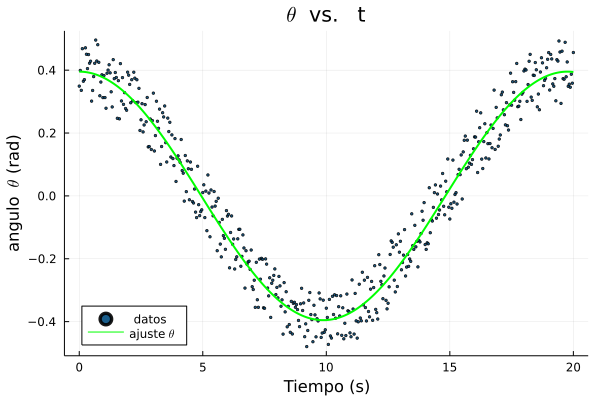

In [16]:
#La primer gráfica que sería el θ vs. tiempo
ajuste(t)= Amp*cos(ω*t)

plot(xlabel="Tiempo (s)", ylabel=L"angulo $ \ \theta $ (rad)", title=L" $ \theta \ $ vs. $ \ $ t ", leg = :bottomleft)

scatter!(Datos.tiempo, Datos.θ_ángulo, label= " datos", markercolor = RGB(0,0.3,0.5), markersize = 1.5, markeralpha = 0.9)

graf1=plot!(Datos.tiempo, ajuste.(Datos.tiempo), label=L"ajuste $\theta$", linewidth=2, linecolor= RGB(0,1,0))

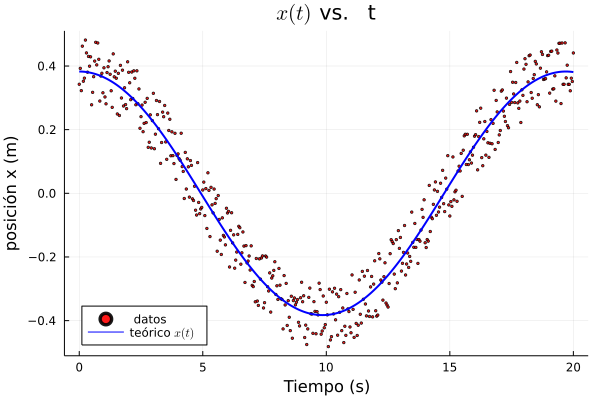

In [17]:
#Segunda gráfica que sería x vs- t
plot(xlabel="Tiempo (s)", ylabel="posición x (m)", title=L" $ x(t) $ vs. $ \ $ t ", leg = :bottomleft)

scatter!(Datos.tiempo, Datos.x_posicion, label= " datos", markercolor = RGB(1,0,0), markersize = 1.5, markeralpha = 0.9)

graf2=plot!(Datos.tiempo, x.(Datos.tiempo), label=L"teórico $x(t)$", linewidth=2, linecolor= RGB(0,0,1))


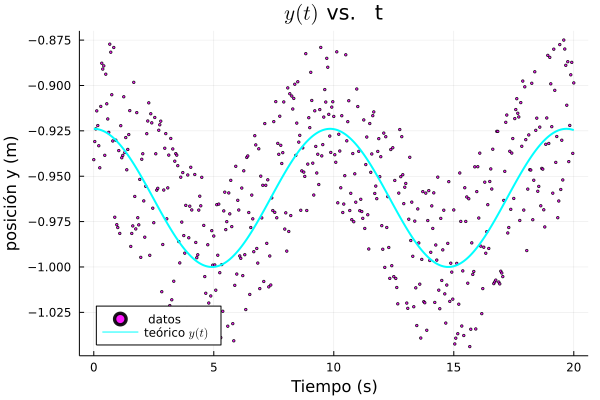

In [18]:
#Segunda gráfica que sería x vs- t
plot(xlabel="Tiempo (s)", ylabel="posición y (m)", title=L" $ y(t) $ vs. $ \ $ t ", leg = :bottomleft)

scatter!(Datos.tiempo, Datos.y_posicion, label= " datos", markercolor = RGB(1,0,1), markersize = 1.5, markeralpha = 0.9)

graf3=plot!(Datos.tiempo, y.(Datos.tiempo), label=L"teórico $y(t)$", linewidth=2, linecolor= RGB(0,1,1))


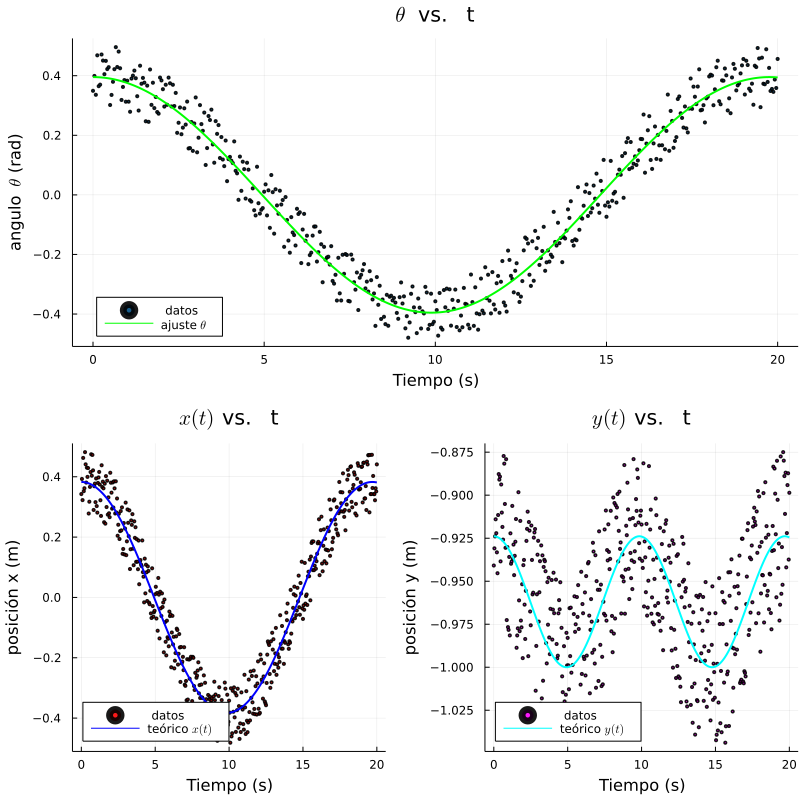

In [19]:
l = @layout [a ; b c]
graf=plot(graf1, graf2, graf3, layout = l, size = (810, 810))

[6] Guarda tu imagen como un archivo pdf y exporta tus datos a un archivo CSV. 

In [20]:
using Images

In [21]:
graf
savefig("graficas.pdf")

In [22]:
CSV.write("Datos_pendulo_simple.csv", Datos)

"Datos_pendulo_simple.csv"

[7-8] (este ejercicio vale 2 porque implica algo más de trabajo) Descarga de <a href=" https://datos.covid-19.conacyt.mx/#DownZCSV">aquí</a> la base de datos de muertes por Covid por municipio y la de casos de Covid por municipio. Carga las respectivas bases de datos y con ellas genera 2 imágenes y dos diccionarios para leer las imágenes. Las imágenes deben contener una base de datos donde cada pixel represente la taza de mortalidad o de casos de covid de cada municipio. Es decir, el pixel $[i,j]$ representa la tasa de mortalidad (la cantidad de muertes dividido entre la población de la entidad) del municipio $i$ el día $j$ de la pandemia. Los diccionarios deben servir para poder descomprimir adecuadamente estas imágenes. Además de estos dos diccionarios, conviene generar otros 2 diccionarios más, para encontrar qué municipio es el municipio $i$ y para encontrar a qué fecha se refiere el día $j$. El de los municipios es igual para ambas bases de datos, pero el de las fechas no. 

¿Puedes ver en las imágenes cuándo fueron cada una de las olas? ¿Notas municipios (regiones) que sigan un comportamiento diferente al de la mayoría de los municipios en el país? 

**Nota:** Hay municipios con población igual a $0$. Esos municipios se debe de poner una tasa de mortalidad o de casos igual a $0$. 

**Nota2:** Para visualizar mejor tus datos, asegúrate que el cambio de colores sea suave. No que de "0.1" tengas un rojo y "0.1001" tengas un verde. Esto no es obligatorio, pero es mejor si lo haces bien. 

In [9]:
Muertes = CSV.File(open(read, "Casos_Diarios_Municipio_Defunciones_20220314.csv")) |> DataFrame #acá cargamos la base

,cve_ent,poblacion,nombre,17-03-2020,18-03-2020,19-03-2020
,Int64,Int64,String,Int64,Int64,Int64
1,16046,15290,Juarez,0,0,0
2,16047,22358,Jungapeo,0,0,0
3,16048,5862,Lagunillas,0,0,0
4,16049,18769,Madero,0,0,0
5,5035,744247,Torreon,0,0,0
6,5036,23781,Viesca,0,0,0
7,7012,56971,Berriozabal,0,0,0
8,11038,12978,Tarandacuao,0,0,0
9,11039,36574,Tarimoro,0,0,0


In [3]:
names(Muertes) #vemos cada una de los nombres de las columnas: la primera pertenece a la clave de la entidad (municipio),  
#después su población total, el nombre y empieza el registro de fechas desde el primer día de la pandemia,
#hasta el 13/03/22

730-element Vector{String}:
 "cve_ent"
 "poblacion"
 "nombre"
 "17-03-2020"
 "18-03-2020"
 "19-03-2020"
 "20-03-2020"
 "21-03-2020"
 "22-03-2020"
 "23-03-2020"
 "24-03-2020"
 "25-03-2020"
 "26-03-2020"
 ⋮
 "02-03-2022"
 "03-03-2022"
 "04-03-2022"
 "05-03-2022"
 "06-03-2022"
 "07-03-2022"
 "08-03-2022"
 "09-03-2022"
 "10-03-2022"
 "11-03-2022"
 "12-03-2022"
 "13-03-2022"

In [10]:
function calcula_la_tasa(poblacion, cantidad_de_muertes_o_casos) #definimos la tasa, para poder aplicarla a cada entidad
    if poblacion != 0 #acá metemos la condición de la Nota1
        tasa = cantidad_de_muertes_o_casos / poblacion
        return tasa
    else
        return 0
    end
end

calcula_la_tasa (generic function with 1 method)

In [11]:
r1 = size(Muertes, 1) #tomamos el número de renglones (cant. de municipios)
c1 = size(Muertes, 2) #tomamos el número de columnas 

function calcula_las_tasas_unicas(r, c, Tabla) #al final definí una función más general 
    tasas_unicas = [] #con esto obtenemos los valores únicos de tasas de mortalidad
    for i in 1:r
        for j in 4:c #empezamos en la columna 4, ya que es en este valor donde empiezan los registros de muertes por día
            push!(tasas_unicas, calcula_la_tasa(Tabla.poblacion[i], Tabla[i, j]))
            unique!(tasas_unicas)
        end
    end
    return tasas_unicas
end

calcula_las_tasas_unicas (generic function with 1 method)

In [6]:
tasas_unicas_de_mortalidad = calcula_las_tasas_unicas(r1, c1, Muertes) #salen 5611 valores únicos (tarda 9min)

5611-element Vector{Any}:
 0.0
 6.540222367560497e-5
 0.00013080444735120994
 4.47267197423741e-5
 0.000170590242238144
 5.3279343598486864e-5
 1.3436399474905508e-6
 2.6872798949811015e-6
 4.030919842471653e-6
 6.718199737452754e-6
 5.374559789962203e-6
 1.0749119579924406e-5
 9.405479632433856e-6
 ⋮
 0.00014342058085335246
 7.171029042667623e-5
 4.9561381771323785e-5
 3.144258583825934e-5
 6.429503706608887e-6
 1.2859007413217774e-5
 1.928851111982666e-5
 3.214751853304443e-5
 2.5718014826435547e-5
 4.5006525946262205e-5
 3.857702223965332e-5
 0.0003502626970227671

In [7]:
sort!(tasas_unicas_de_mortalidad); #ordenamos la lista del menor valor al mayor,sin mostrarlo para no hcaer bulto

In [2]:
using Images, ImageView, ImageIO #estas paqueterías son necesarias para cargar y visualizar la imagen y usar el RGB

In [9]:
function da_la_lista_de_base(tasas_unicas) #al final la definí como una función, que dada la lista de tasas arroja la base de colores
    b = 1/256 #Aquí haremos la base de colores en N0f8. Esta variable, b, es la mínima escala que puede valer una entrada en RGB, para RGB{N0f8}
    d = 1 #este será un contador
    base_de_colores = [] #creamos un arreglo vacío que más adelante servira como nuestro diccionario y nos ayudara a hacer la imagen
    j = 1 #y un segundo contador, que nos indicará en que múltiplo de 256 estamos
    for i in d:length(tasas_unicas) #aquí barremos cada elemento de tasas_unicas, empezando por d
        if i < j*256 #barremos de 255 elementos en 255 con ayuda de la j
            if (i-d)*b == 0.5
                push!(base_de_colores, [RGB{N0f8}(j*b, (i-d)*b, 0.504), tasas_unicas[i]]) #esta línea la agregue al final para solucionar un problema donde a 2 tasas distintas me asignaba
                #el mismo valor RGB{Nf08}, creo que es por algún tipo de reodndeo del tipo flotante, o la precisión (idk)
            else
                push!(base_de_colores, [RGB{N0f8}(j*b, (i-d)*b, 0.5), tasas_unicas[i]])#guardamos como elemento un color asociado a cada valor de la lista tasas_unicas. 
                #Ahora en cuanto al color RGB asociado, necesitamos 5611 tonalidades distintas, lo que se logra con 22 veces 256 (es un número entero ya que eso implica RGB{N0f8}).
                #Así para la construcción, fijamos la tercera entrada de RGB{N0f8} a un valor cte, la i recorre de 256 elementos en 256 (el elemento 256 se añade en la celda de abajo),
                #y es la j quien irá de 1 a 22, implícitamente, para cubrir el total de los 5611 elementos de tasas únicas, aisgnándoles una tonalidad única
                #println(i, ", ",  j, ", ", d) #estas lineas se hicieron para comprobar como funciona el programa
            end
        elseif i == j*256 #cuando llegamos al elemento 256 o múltiplos de este
            push!(base_de_colores, [RGB{N0f8}(j*b, (i/j)*b, 0.5), tasas_unicas[i]]) #agregamos el elemento igual que en el caso anterior
            d = i+1 #pero a su vez aumentamos el valor de d al siguiene valor que debe tomar i, forzando a que i recorra de 256 elementos en 256
            j += 1 #también incrementamos j, quien hará que esta nueva repetciión de i sea distinta a la anterior
            #el actualizar tanto d como j y por ende sus expresiones en RGB{N0f8}() nos granatiza que cada entrada de RGB cumpla con estar en formato 8bit
            #println(i, ", ",  j, ", ", d) #otra entrada para comprobar el funcionamiento
        end
    end
    return base_de_colores #imprimimos el arreglo
end

da_la_lista_de_base (generic function with 1 method)

In [10]:
base_de_colores_mortalidad = da_la_lista_de_base(tasas_unicas_de_mortalidad) #la usamos con la lista de tasas de muertes

5611-element Vector{Any}:
 Any[RGB{N0f8}(0.004,0.0,0.502), 0.0]
 Any[RGB{N0f8}(0.004,0.004,0.502), 5.507969756839659e-7]
 Any[RGB{N0f8}(0.004,0.008,0.502), 5.588056311961067e-7]
 Any[RGB{N0f8}(0.004,0.012,0.502), 5.855644314110815e-7]
 Any[RGB{N0f8}(0.004,0.016,0.502), 5.887516639593903e-7]
 Any[RGB{N0f8}(0.004,0.02,0.502), 5.953763075952155e-7]
 Any[RGB{N0f8}(0.004,0.024,0.502), 6.651125204106405e-7]
 Any[RGB{N0f8}(0.004,0.027,0.502), 6.826264736198999e-7]
 Any[RGB{N0f8}(0.004,0.031,0.502), 6.976614388569515e-7]
 Any[RGB{N0f8}(0.004,0.035,0.502), 8.496414937717031e-7]
 Any[RGB{N0f8}(0.004,0.039,0.502), 8.804475490981575e-7]
 Any[RGB{N0f8}(0.004,0.043,0.502), 8.890192783830517e-7]
 Any[RGB{N0f8}(0.004,0.047,0.502), 9.195588324545416e-7]
 ⋮
 Any[RGB{N0f8}(0.086,0.871,0.502), 0.0022371364653243847]
 Any[RGB{N0f8}(0.086,0.875,0.502), 0.0023148148148148147]
 Any[RGB{N0f8}(0.086,0.878,0.502), 0.00234192037470726]
 Any[RGB{N0f8}(0.086,0.882,0.502), 0.002398081534772182]
 Any[RGB{N0f8}(0.086,

In [15]:
base_de_colores_mortalidad[1][1] #con esto vemos el color asociado al valor de tasa más bajo
base_de_colores_mortalidad[length(tasas_unicas_de_mortalidad)][1] #con esto vemos el color asociado al valor de tasa más alto

In [11]:
function crea_la_imagen_de_la_base(renglones, columnas, base_de_colores, Tabla) #lo mismo, convertí esto en una función más general
    Imagen = fill(RGB(1, 1, 1), (renglones, columnas-3)) #creamos la imagen con los píxeles dados por la cantidad de municipios y los días de la pandemia 
    for i in 1:renglones #barremos los municipios
        for j in 4:columnas #barremos los días de la pandemia. Empezamos en la columna 4, ya que es en este valor donde empiezan los registros de muertes por día
            p = calcula_la_tasa(Tabla.poblacion[i], Tabla[i, j]) 
            for k in 1:length(base_de_colores) #barremos cada elemento de la base de colores
                if p == base_de_colores[k][2] #comparamos el valor de p con todos los valores de tasa en la base de colores
                    Imagen[i, j-3] = base_de_colores[k][1] #una vez encontrado el elemento de base de datos que coincide con p, le asignamos el color asociado a dicho valor
                    #la entrada del pixel es j-3 para barrer los 727 días de pandemia, concordante con las dimensiones de la imagen
                    #destacamos que no puede haber el caso de que p difiera de algún elemento en la base_de_colores, ya que está tiene todos los valores unicos de tasas
                end
            end
        end
    end  
    return Imagen 
end

crea_la_imagen_de_la_base (generic function with 1 method)

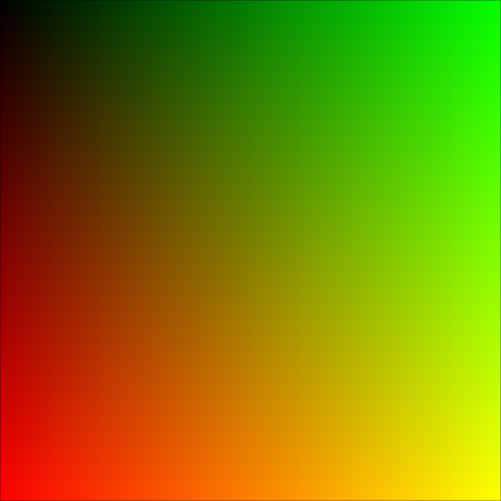

In [8]:
lista=[RGB(i,j,0) for i in 0:0.001:1, j in 0:0.001:1]
lista

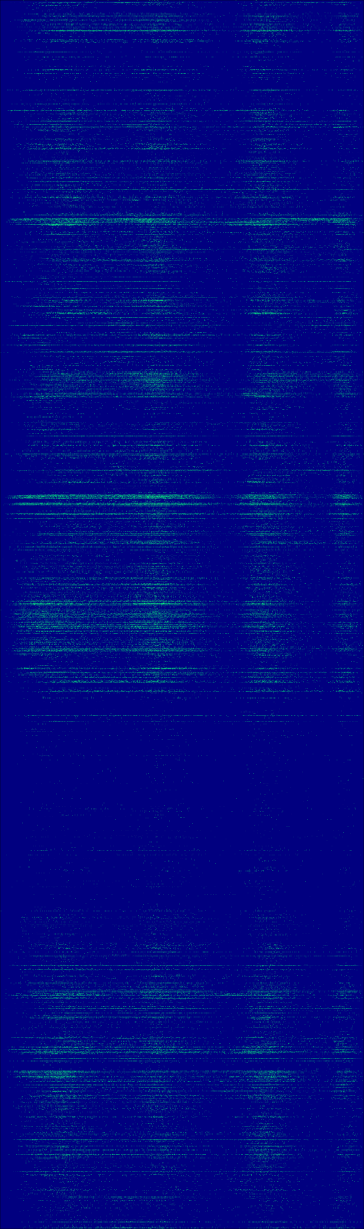

In [12]:
Imagen_mortalidad = crea_la_imagen_de_la_base(r1, c1, base_de_colores_mortalidad, Muertes) #imprimimos la imagen, tarda 6min

In [23]:
save("muertes_covid.png", Imagen_mortalidad) #guardamos la imagen, ya que la anterior línea tardaba un poco

In [4]:
muertes = load("muertes_covid.png"); #cargamos la imagen
dic_tasas_de_mortalidad = Dict(base_de_colores_mortalidad) #este sería el primer diccionario, que nos da la tasa de mortalidad del pixel [i,j]

In [25]:
muertes[1,47] #prueba diccionario 1: pixel 46,0 en paint de windows
dic_tasas_de_mortalidad[muertes[1,47]]
#muertes[2000,1]

6.540222367560497e-5

In [7]:
function da_el_dic_municipios(Tabla, r) #este lo definimos como función, ya que lo aplicaremos para ambas bases de datos
    dic_municipios = Dict(i => Tabla.nombre[i] for i ∈ 1:r) #acá creamos el segundo diccionario, que dado el índice de renglon
    #nos da el nombre del municipio
    return dic_municipios
end

da_el_dic_municipios (generic function with 1 method)

In [12]:
dic_municipios_mortalidad = da_el_dic_municipios(Muertes, r1)
dic_municipios_mortalidad[2400] #prueba diccionario 2
#Muertes.nombre[2400] #dato en la tabla

"Juchipila"

In [13]:
dic_dia_de_pandemia_mortalidad = Dict(i => names(Muertes)[3+i] for i ∈ 1:c1-3) #acá creamos el tercer diccionario, que recibe un 
#índice referente a la columna del pixel y arroja el día de la pandemia que representa (va de 1 a 727)
dic_dia_de_pandemia_mortalidad[700] #prueba diccionario 3
#names(Muertes)[703] #dato en la tabla, aquí va desplazado en 3, porque contamos las columnas totales

"14-02-2022"

Ahora vamos con la segunda base de datos. Para la cual repetimos algunos pasos anteriores en el mismo orden.

In [4]:
Casos = CSV.File(open(read, "Casos_Diarios_Municipio_Confirmados_20220314.csv")) |> DataFrame #acá cargamos la base

,cve_ent,poblacion,nombre,26-02-2020,27-02-2020,28-02-2020
,Int64,Int64,String,Int64,Int64,Int64
1,16046,15290,Juarez,0,0,0
2,16047,22358,Jungapeo,0,0,0
3,16048,5862,Lagunillas,0,0,0
4,16049,18769,Madero,0,0,0
5,5035,744247,Torreon,0,0,1
6,5036,23781,Viesca,0,0,0
7,7012,56971,Berriozabal,0,0,0
8,11038,12978,Tarandacuao,0,0,0
9,11039,36574,Tarimoro,0,0,0


In [ ]:
r2 = size(Casos, 1) #tomamos el número de renglones (cant. de municipios)
c2 = size(Casos, 2) #tomamos el número de columnas 
tasas_unicas_de_casos = calcula_las_tasas_unicas(r2, c2, Casos) #salen ? valores únicos (por alguna razón no me termina de cargar, aún esperando 1hr)

In [ ]:
sort!(tasas_unicas_de_casos); #ordenamos la lista del menor valor al mayor

In [ ]:
base_de_colores_casos = da_la_lista_de_base(tasas_unicas_de_casos) #la usamos con la lista de tasas de casos

In [ ]:
Imagen_casos = crea_la_imagen_de_la_base(r2, c2, base_de_colores_casos, Casos) #imprimimos la imagen

In [ ]:
save("casos_covid.png", Imagen_casos) #guardamos la imagen, ya que la anterior línea tarda en dar el resultado 

In [ ]:
casos = load("casos_covid.png"); #cargamos la imagen
dic_tasas_de_casos = Dict(base_de_colores_casos) #1er diccionario, que nos da la tasa de casos del pixel [i,j]

In [ ]:
dic_municipios_casos = da_el_dic_municipios(Casos, r2)#2do diccionario, el mismo que el anterior (tanto en orden como en cantidad de municipios)

In [ ]:
dic_dia_de_pandemia_casos = Dict(i => names(Casos)[3+i] for i ∈ 1:c2-3) #3er diccionario, que recibe un 
#índice referente a la columna del pixel y arroja el día de la pandemia que representa (va de 1 a 747 valores)

In [22]:
#imshow(muertes) #usamos este comando para y algunos como el siguiente para responder las preguntas
for i in 989:997
    println(dic_municipios_mortalidad[i])
end

Guadalajara
Hostotipaquillo
Azcapotzalco
Coyoacan
Cuajimalpa de Morelos
Gustavo A. Madero
Iztacalco
Iztapalapa
La Magdalena Contreras


Las olas corresponderían a las franjas vérticales que se forman en la imagen para el caso de la imagen muertes (tasa de mortalidad) estas son 4 olas: la primera de ellas abarcó del día 19-04-2020 al 22-09-2020, la segunda del 01-11-2020 al 05-05-2021, la tercera del 05-07-2021 al 27-10-2021 y la cuarta (y más pequeña) del 05-01-2022 al 20-02-2022.
Respecto a la segunda pregunta, destacan los municipios de Azcapotzalco, Coyoacán, Cuajimalpa de Morelos, GAM, Izatacalo, Iztapalapa y La Magdalena Contreras como aquellos con mayor tasa de defunciones a lo largo de la pandemia (franjas horizontales). Por otro lado, los municipios de San Juan de los Cues, los de San Antonio, San Baltazar, San Bartolome, San Dionisio, Santiago Apostol, entre otro más, muestran un comportamiento con bajas tasas de motalidad durante toda la pandemia.

In [5]:
#Sólo se respondió para la primera imagen, ya que la segunda nunca me termino de cargar a partir de donde obtengo las
#tasas unicas. Para los días y municipios mencionados se usaron los diccionarios 2 y 3, respectivamente.

[9] Utiliza tus imágenes y funciones anteriores para ahora graficar las tasas de casos de covid en los 3 municipios donde la tasa de casos haya sido la más alta en algún día. Repite lo mismo para las tasas de mortalidad por covid. 

Observando la imagen, seleccione el día 06-01-2021. Donde los 3 municipios seleccionados con mayor tasa de mortalidad para dicho día son: Gustavo A. Madero, Iztacalco e Iztapalapa. (También escogí en particular estos 3 municipios, pues son algunos de los cuales más frecuento y donde resido)

In [36]:
println(dic_dia_de_pandemia_mortalidad[296]) #acá las ubicaciones en la imagen
for i ∈ 994:996
    println(dic_municipios_mortalidad[i])
end

06-01-2021
Gustavo A. Madero
Iztacalco
Iztapalapa


In [34]:
using Plots

In [43]:
function calcula_los_puntos_en_y(indice_de_municipio, columnas, Tabla) #con esta función calculamos las tasas de todos los días, dado un municipio
    tasas_mortalidad_del_municipio = []
    for j in 4:columnas
        push!(tasas_mortalidad_del_municipio, calcula_la_tasa(Tabla.poblacion[indice_de_municipio], Tabla[indice_de_municipio, j]))
    end
    return tasas_mortalidad_del_municipio
end

calcula_los_puntos_en_y (generic function with 1 method)

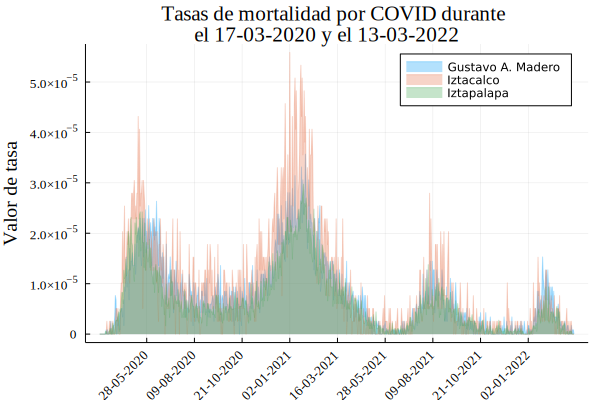

In [159]:
plot(names(Muertes)[4:end], calcula_los_puntos_en_y(994, c1, Muertes), label = "Gustavo A. Madero", fill = true, alpha = 0.30) #acá la gráfica
plot!(tickfont = (8, "arial", :black), xrot = 45, ylabel = "Valor de tasa", guidefont = (12, "arial", :black))
plot!(title = "Tasas de mortalidad por COVID durante \n el 17-03-2020 y el 13-03-2022", titlefont = (13, "times"))
plot!(names(Muertes)[4:end], calcula_los_puntos_en_y(995, c1, Muertes), label = "Iztacalco", fill = true, alpha = 0.30)
plot!(names(Muertes)[4:end], calcula_los_puntos_en_y(996, c1, Muertes), label = "Iztapalapa", fill = true, alpha = 0.30)

[10] Haz una convolución de tu imagen, donde el kernel sea: $$\begin{pmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0\\
1/7 & 1/7 & 1/7 & 1/7 & 1/7 & 1/7 & 1/7\\
0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0
\end{pmatrix}$$

después con la nueva imagen obtén los casos de covid para los mismos 3 municipios y grafica el número de casos de covid como función del tiempo. 

¿Qué es lo que hicieste con esa convolución?

**Nota:** otra opción de convolución buena es: $$\frac{1}{98}\begin{pmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0\\
1 & 6 & 24 & 36 & 24 & 6 & 1\\
0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0
\end{pmatrix}$$



## Problemas avanzados

Esta vez tengo menos problemas, así que los problemas avanzado comienzan en uno para sacar 8 (que con una mejora se puede volver un ejercicio para sacar 10) y termina en un ejercicio para sacar 11 de Maching Lerning. 



Para sacar 8: 

Obtén de <a href="https://smn.conagua.gob.mx/es/climatologia/informacion-climatologica/informacion-estadistica-climatologica">aquí</a> los datos de temperatura máxima y mínima diaria de alguna estación meteorológica con al menos 30 años de datos. Con esos datos has un archivo CSV (vía cualquier editor de texto, por ejemplo notepad). Lee la base de datos (que debería tener fecha, precipitación, evaporación, t_max y t_min). Utiliza LsqFit para ajustar una recta a los datos de temperatura máxima y a los datos de temperatura mínima como función del tiempo. Grafica los datos y las respectivas rectas ajustadas. Asegúrate que los datos que tomes en cuenta para el ajuste comiencen y terminen en la misma fecha del año. Por ejemplo del 15 de marzo de 1981 al 15 de marzo de 2021. Entre más datos, mejor, pero siempre cumpliendo con que terminen e inicien en el mismo día del año (sino puedes obtener pendientes negativas o positivas sólo porque tomaste de invierno a verano o vise versa). 
    
La ordenada al origen representa algo así como el valor inicial de la temperatura, mientras que la pendiente representa el cambio de temperatura en el tiempo. Si es positivo, entonces se está calentando en el tiempo el lugar donde se midió la temperatura. 
    
Ahora repite esto mismo para muchas estaciones, al menos 20 estaciones (aunque sería mejor unas 100). No es necesario que grafiques los datos de todas, pero te recomiendo hacerlo una vez para que elijas qué estación es más representativa de las conclusiones finales que tengas. Lo que sí necesitas hacer es obtener la ordenada al origen y la pendiente de la curva que mejor se ajuste. Recuerda que por cada estación obtienes 2 ordenadas al origen y dos pendientes, que representan lo de las temperaturas máximas y lo de las temperaturas mínimas. 
    
Finalmente, haz un histograma de tus pendientes ¿Notas que haya calentamiento? ¿cuantos grados por año se está calentando o enfriando en promedio las regiones que observaste?
    
**Nota:** El problema se vuelve de 10 si programas una forma automática de leer los datos de muchas estaciones (quizá así puedes revisar unas 1000 estaciones de golpe). Pista: Usa HTTP y nota que los archivos de la conagua están en páginas con el nombre del archivo y esos nombres siguen un código. El problema no es tan sencillo, porque tienes que eliminar varias filas del archivo que tienen información irrelevante para estos propósitos, además de que hay por ahí símbolos incómodos y el código debe también quedarse con las estaciones que tengan suficientes datos. 

Problema para sacar 9: 

Baja de [<em>aquí<em>](https://covid.ourworldindata.org/data/owid-covid-data.csv) la base de datos de covid para el mundo. 
    
(i) Haz una función que busque el primer día de contagio para cada país y obtenga los datos de los primeros 100 días desde el primer día de contagio (similar para las muertes). 

(ii) Ajusta usando LsqFit una exponencial ($A e^{\lambda x} + b$) y una ley de potencias ($m x^{\beta}+b$) a los datos de los primeros 100 días de pandemia en todos los países de America, Europa y Asia con más de 100 días de contagios. Oceanía lo descarto porque han tenido muy pocos casos en general, así que la estadística no es buena y África tuvieron pésimos registros durante casi toda la pandemia, así que los datos no son nada confiables. 

    
(iii) Haz dos gif animados, uno donde tengas un ajuste con una exponencial y otro donde tengas un ajuste con una ley de potencias para todos los países, graficando del número de casos totales como función del número de días desde el primer caso reportado y cuyo título sea el nombre del país. 
     
¿En general qué ajuste es mejor: el de crecimiento exponencial o el de ley de potencias?
    



Problema para sacar 10: 

Haz un bot de Télegram (en un notebook aparte) que registre todas las palabras que utilice cada usuario (y por usuario), es decir, el bot debe generar una base de datos con las siguientes columnas: "Palabras", "ContadorNombreDeUsuario1", "ContadorNombreDeUsuario2", etc...(NombreDeUsuario$i$ debe de sustituirse por el nombre del usuario $i$) donde cada contador es el número de veces que ese usuario a usado la respectiva palabra. 

Añade tu bot (necesita ser administrador el bot, sino no puede responder los mensajes) a un grupo con amigos (o compañeros de equipo) y platica con tus amigos (compañeros) lo más "natural" posible (como si no existiera el bot) y tanto como puedas (por lo tanto, entre más cercanos sean tus amigos (compañeros) será mejor). Con cada frase que se ponga en el grupo el bot debe descomponerla en "palabras" (en español usando la paquetería StringEncodings) omitiendo signos de puntuación. De cada palabra, si una palabra no existe, la añade a la base de datos y pone el contador del usuario que la usó en 1 y los demás en 0. Si la palabra existe simplemente actualiza el contador para el usuario correspondiente. 

El bot debe además, con cada frase que se escriba, crear (o re-escribir) un archivo CSV que contenga la base de datos. 

También debes definir los comandos "\Graficar" y "\PalabrasComunes":

1. Si lo que se envía al bot es el comando "\Grafica", el bot debe regresar al grupo de télegram una gráfica de Zipf, es decir, en el eje $y$ la frecuencia de cada palabra dividido entre el conteo total de palabras de ese usuario, ordenado de mayor a menor la frecuencia de las palabras y en el eje $x$ los números 1,2,... que corresponden a la posición de cada palabra (la más frecuente, la segunda más frecuente, etc...). Ambos ejes deben estar en escala logarítmica, por lo que es necesario que si el contador de alguna palabra es 0, se sustituya por NaN. 
2. Si el comando que se envía al bot es "\PalabrasComunes" el bot debe de regresar "usuario1: palabra1usuario1, palabra2usuario1,...,palabra10usuario1", "usuario2:, palabra1usuario2,palabra2usuario2, ...alabra10usuario2" , ... con usuarioi el nombre del usuario i, y palabra$j$usuarioi la $j$-esima plabra más común del usuario $i$ (sólo las 10 primeras palabras).

Finalmente, en este notebook analiza la base de datos que hayas generado con el bot. Para cada usuario haz su gráfica de Zipf con un ajuste a una ley de potencias $a x^b$. Es importante antes de ajustar los datos ver la gráfica, pues típicamente la ley de potencias no se ajusta bien para todos los datos, así que hay que considerar sólo aquellos donde se ve "más o menos una recta" cuando se grafica en log-log (si tienes dudas, pregúntame vía télegram mostrándome la gráfica que obtuviste). 

Recuerda también que realmente se necesita una conversación larga. La palabra más común debería por lo menos aparecer $10^3 veces$ (es decir, en verdad les recomiendo elegir personas con las que puedan chismear a gusto para la parte de probar su bot). 

¿Qué valores de $b$ se obtiene para cada usuario? 


Problema alterno para sacar 11: 

Muy similar al problema anterior, pero en vez de buscar obtener la gráfica de Zipf, lo que buscarás es la probabilidad de una palabra dada otra. Es decir, se tiene que hacer una matriz donde el elemento $i,j$ es la probabilidad de que la palabra $i$ aparezca después de la palabra $j$. Conviene pre-hacer esta matriz con $0$'s inicialmente. Para esto uno tiene que tener un estimado del tamaño de la matriz. En español hay al rededor de $10^5$ palabras, pero coloquialmente usamos unas $2 \times 10^3$, así que podemos restringirnos a una matriz cuadrada de $(2 \times 10^3) \times (2 \times 10^3)$ elementos. Eso sigue siendo una matriz gigante y por lo tanto una base de datos gigante. Conviene hacerlo como una imagen y su respectivo diccionario. En vez de que la matriz nos diga la probabilidad, nos puede decir el número de veces que ha ocurrido la palabra $j$ después de la palabra $i$. 

El bot debe primero leer cada mensaje y descomponerlo en palabras y puntos (excluyendo todos los demás signos de puntuación, incluido "..."). Después debe separar el mensaje en fraces, es decir, obtener los arreglos de palabras que comienzan en la primera palabra y terminan en un punto  o la última palabra (lo que suceda primero), o que cominzan en la palabra después de un punto y terminan en otro punto o la última palabra (lo que suceda primero). Después debe buscar cada palabra en un arreglo de palabras $palabras$ que se tenga (inicialmente vacío). Si la palabra no se encuentra en $palabras$, entonces debe agregarse al arreglo. Después, cada frase se debe cambiar por un arreglo $indices$_$palabras$ de números naturales, de forma que si $j = indices$_$palabras[i]$, entonces $palabras[j]$ será la $i$-estima palabra de la frase. Finalmente, se debe buscar para cada elemento de $indices$_$palabras$ excepto el último, cuál es el valor $j = indices$_$palabras[i]$ y el valor $k = indices$_$palabras[i+1]$ y modificar la imagen de la base de datos, agregando un elemento al pixel $(j, k)$. 

Además el bot debe generar una lista de las palabras usadas, pero ordenadas de la más probable a la menos probable (para esto debe de haber una lista de la frecuencia de aparición de cada palabra).

Por último, usando esa base de datos se debe hacer una función que tenga como argumento una palabra y que arroje la palabra más probable que vendría después (si aún no hay una sugerencia, entonces debe proponer la palabra más frecuente). Si la palabra del argumento no está en la lista de $palabras$, entonces debe arrojar un error. 

Entrena tu función predictiva con una conversación o muchas conversaciones largas en telegram (tan largas como te sea posible). 

Luego, utiliza tu función para producir una frase de 20 palabras, comenzando con una palabra cualquiera de tu lista $palabras$ y después generando con eso una sugerencia de palabra que a su vez es el imput de tu función de su gerencia y así iterativamente 20 veces. ¿Sale una frase con sentido? 

**Nota:** Como pre-fijas el tamaño de la matriz, una vez que se el arreglo $palabras$ llega a $2\times 10^3$ se dejan de agregar elementos y las frases deben separarse no sólo por puntos, sino por cualquier palabra de que no se encuentre en $palabras$. 

**Nota2:** Si haces este problema, habrás hecho tu primer programa de Maching Lerning del curso. 